In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
data = pd.Series(np.around(np.random.normal(loc = 0, scale = 1, size = (1000)), decimals = 2))

In [3]:
# a) Tendência central
media, mediana, moda = data.mean(), data.median(), data.mode()[0]
print("Média: ", media)
print("Mediana: ", mediana)
print("Moda: ", moda)

Média:  0.029489999999999978
Mediana:  -0.01
Moda:  -0.44


In [4]:
# b) Momento de primeira e central de segunda ordem
variancia = data.var(ddof = 0)
print("Primeira: ", media)
print("Segunda: ", variancia)

Primeira:  0.029489999999999978
Segunda:  0.9458550399000004


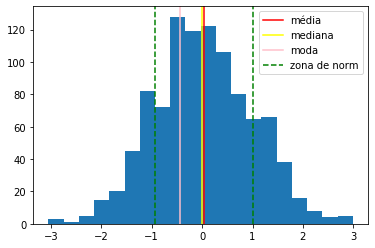

In [5]:
# c) e d) Plote a distribuição da variável, marcando os valores acima calculados e verificar visualmente a normalidade
plot = plt.hist(data, 20)
plot = plt.axvline(media, c = "red", label = "média")
plot = plt.axvline(mediana, c = "yellow", label = "mediana")
plot = plt.axvline(moda, c = "pink", label = "moda")
plot = plt.axvline(media + math.sqrt(variancia), c = "green", ls = "--", label = "zona de norm")
plot = plt.axvline(media - math.sqrt(variancia), c = "green", ls = "--")
plot = plt.legend()

In [6]:
# e) Verifique numericamente o grau de assimetria e curtose da variável
coefAssimPearson = (media - moda) / math.sqrt(variancia)
print("Coeficiente de Assimetria de Pearson: ", coefAssimPearson)
tipoAssimetria = "à esquerda" if coefAssimPearson < 0 else "à direita"
if abs(coefAssimPearson) < 0.15:
    print("Assimetria fraca " + tipoAssimetria)
else:
    print("Assimetria moderada " + tipoAssimetria) if coefAssimPearson < 1 else print("Assimetria forte " + tipoAssimetria)
q3, q1, p90, p10 = data.quantile(0.75), data.quantile(0.25), data.quantile(0.9), data.quantile(0.1)
coefCurt = (q3 - q1) / (2 * (p90 -p10))
print("Coeficiente de Curtose: ", coefCurt)
if coefCurt == 0.263:
    print("Curva mesocúrtica")
else:
    print("Curva platicúrtica") if coefCurt < 0.263 else print("Curva leptocúrtica")

Coeficiente de Assimetria de Pearson:  0.4827408549108328
Assimetria moderada à direita
Coeficiente de Curtose:  0.2657078743370053
Curva leptocúrtica


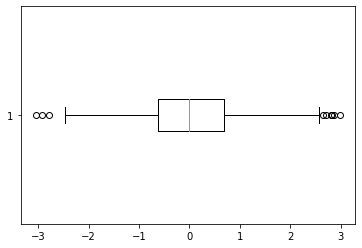

In [7]:
# f) Confirme a normalidade da variável através do Q-Q Plot
plot = plt.boxplot(data, vert = False)